Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/INSE 6220
Accuracy: 0.9259259259259259
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54

Mode:
age          54.0
sex           1.0
cp            3.0
trestbps    120.0
chol        234.0
fbs           0.0
restecg       2.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          1.0
target        0.0
Name: 0, dtype: float64

Mean:
age          54.433333
sex           0.677778
cp            2.174074
trestbps    131.344444
chol        249.659259
fbs           0.148148
restecg       1.022222
thalach     149.677778
exang   

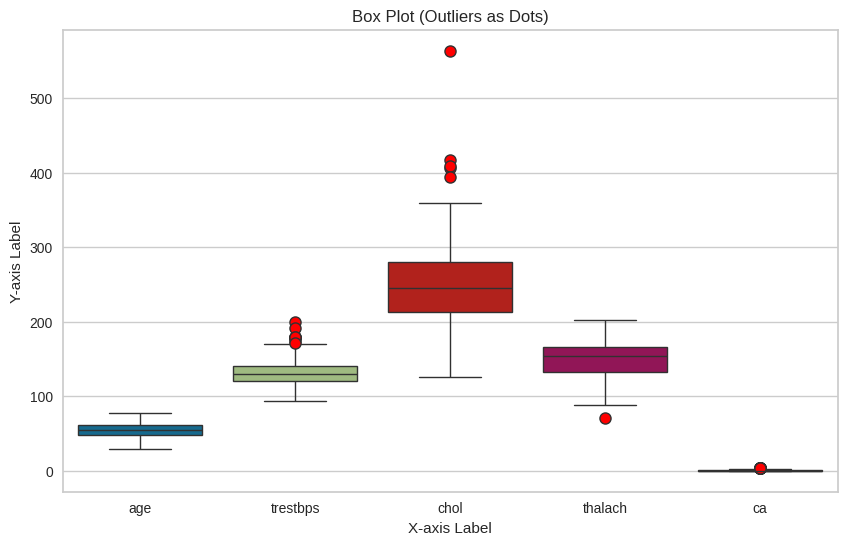

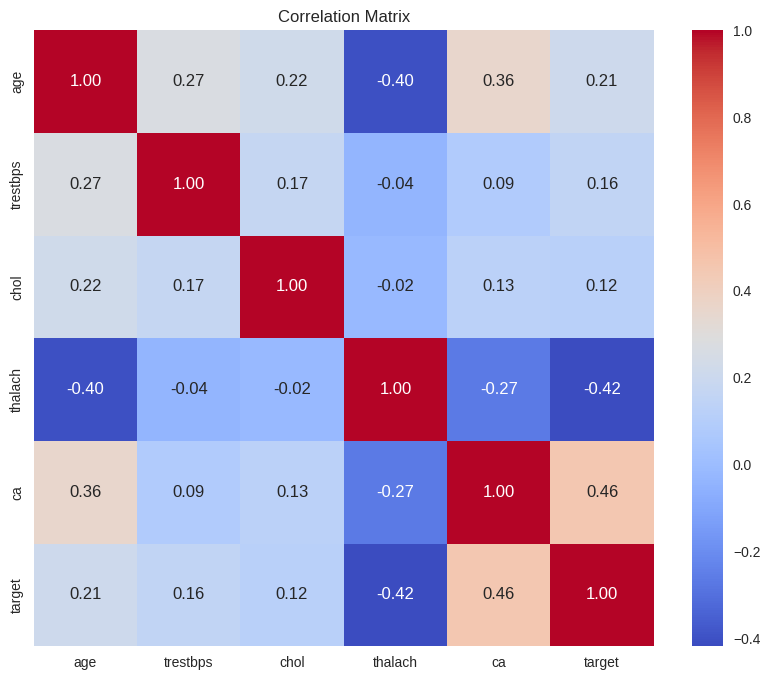

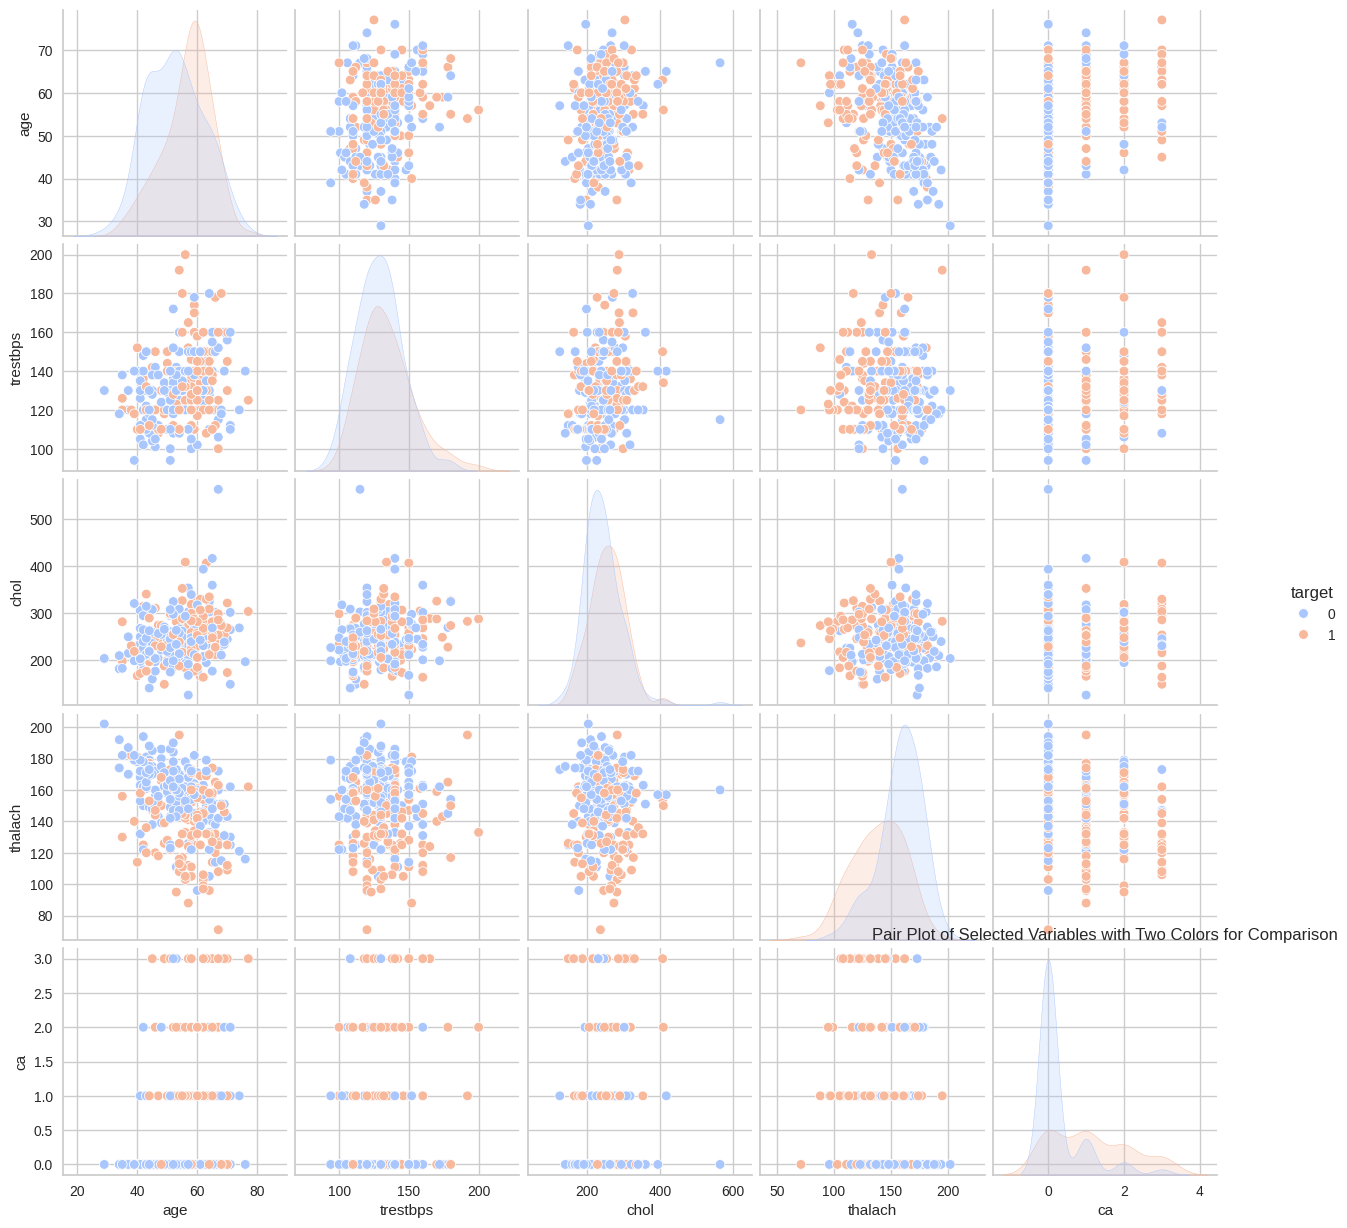

Eigenvalues:
[2.68696297e+03 5.53062167e+02 3.11140942e+02 5.90963813e+01
 7.58163541e-01]

Eigenvectors:
[[-4.12312892e-02  1.79321691e-01  1.19162942e-01  9.75221054e-01
  -2.97959979e-02]
 [-6.80973942e-02  8.44675531e-02  9.84376134e-01 -1.38677160e-01
   4.99329611e-04]
 [-9.96744463e-01 -2.55490882e-02 -7.08208391e-02 -2.88243440e-02
  -1.13347738e-03]
 [ 1.25472238e-02 -9.79760290e-01  1.08548799e-01  1.67608641e-01
   6.06990542e-03]
 [-2.40158453e-03  1.12241836e-02  2.32097091e-03  2.80899009e-02
   9.99536803e-01]]


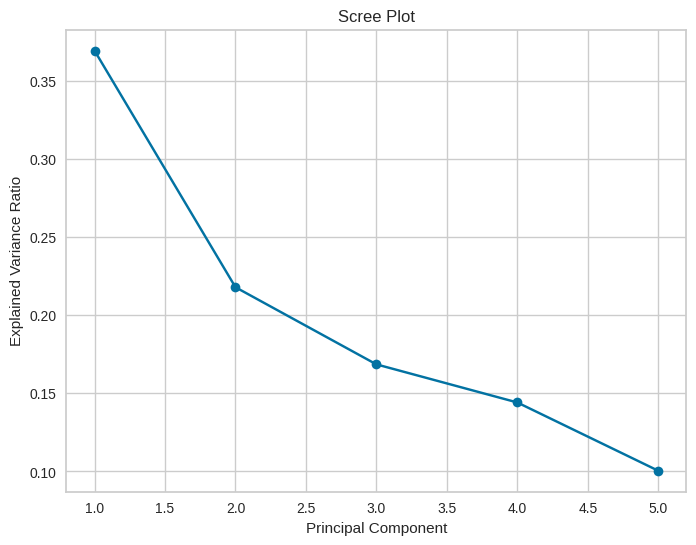

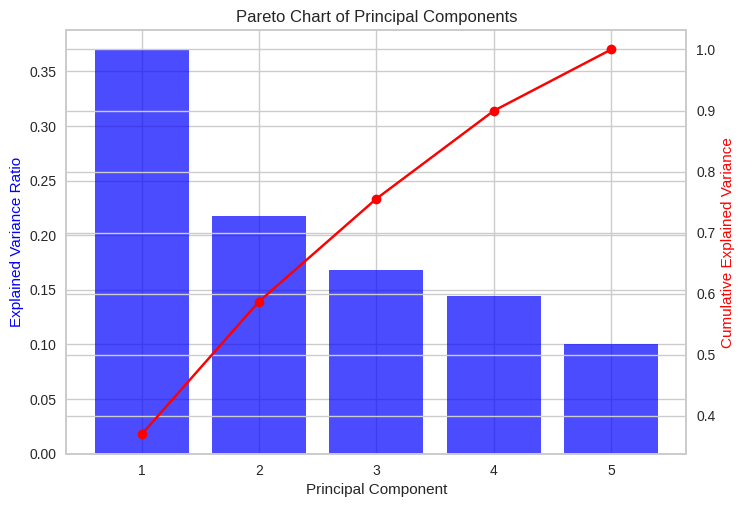

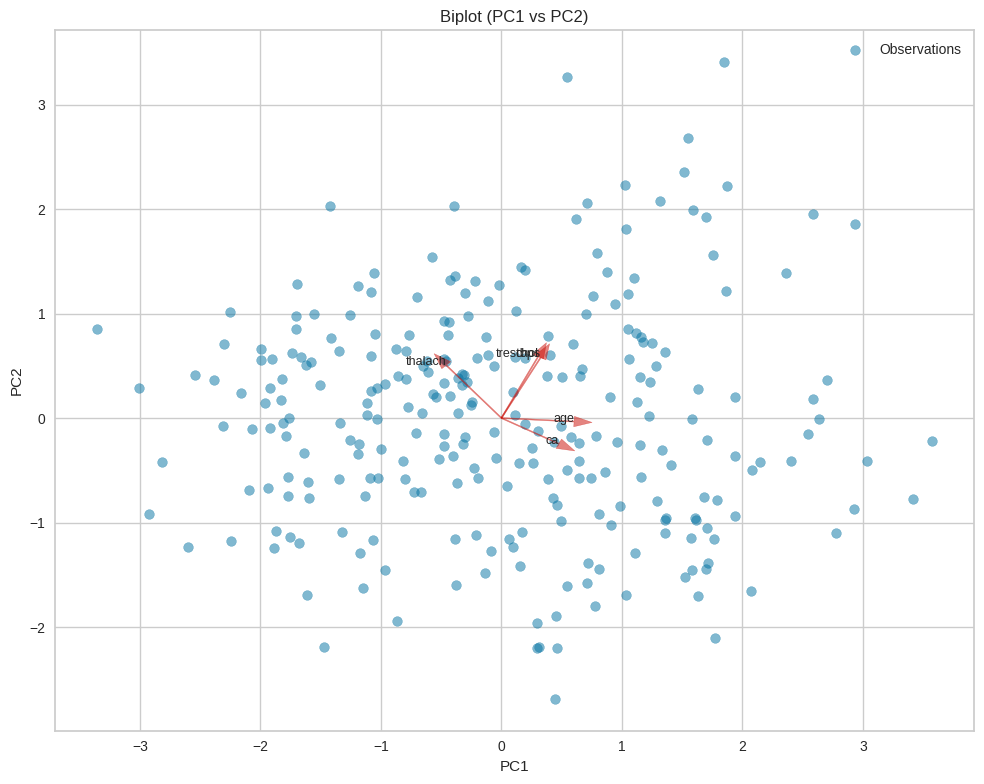

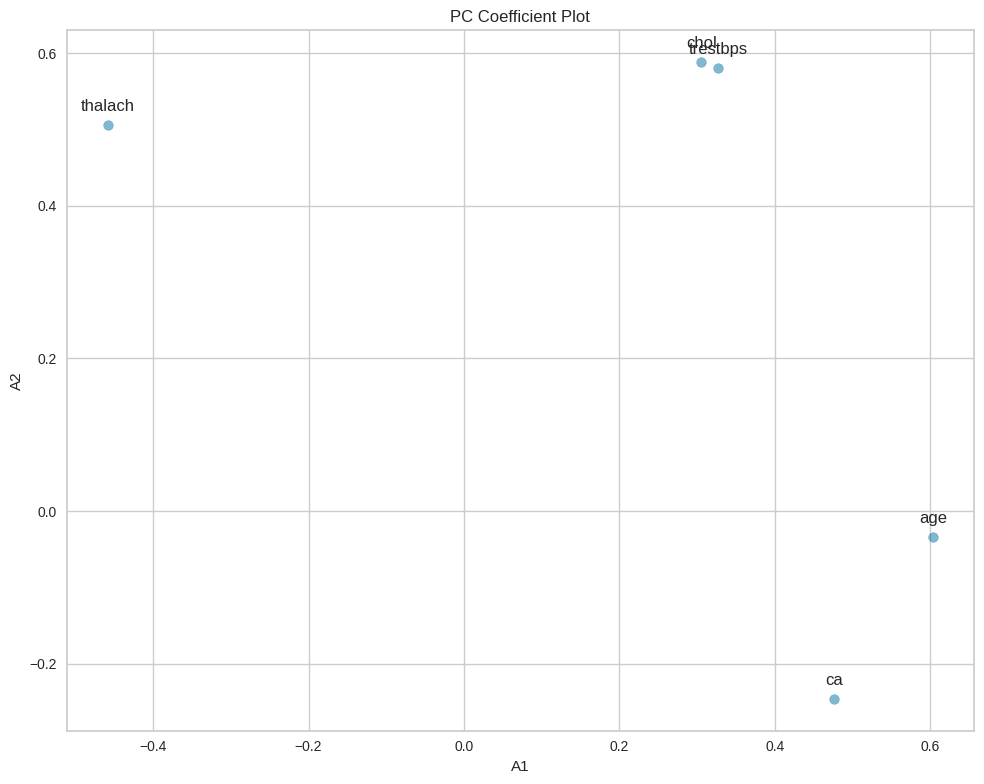

Evaluation Metrics Results (Before PCA):
                     Accuracy       AUC    Recall     Prec.        F1  \
Logistic Regression  0.759259  0.759740  0.761905  0.666667  0.711111   
Naive Bayes          0.759259  0.751082  0.714286  0.681818  0.697674   
Gradient Boosting    0.740741  0.744589  0.761905  0.640000  0.695652   
Random Forest        0.722222  0.729437  0.761905  0.615385  0.680851   
AdaBoost             0.685185  0.690476  0.714286  0.576923  0.638298   
SVM                  0.629630  0.584416  0.380952  0.533333  0.444444   
KNN                  0.629630  0.627706  0.619048  0.520000  0.565217   
Decision Tree        0.555556  0.549784  0.523810  0.440000  0.478261   

                        Kappa       MCC  TT (Sec)  
Logistic Regression  0.506329  0.509647  0.011694  
Naive Bayes          0.497854  0.498226  0.004138  
Gradient Boosting    0.472803  0.478260  0.151974  
Random Forest        0.439834  0.447708  0.172108  
AdaBoost             0.365145  0.371682  

,Description,Value
0,Session id,4126
1,Target,target
2,Target type,Binary
3,Original data shape,"(270, 6)"
4,Transformed data shape,"(270, 6)"
5,Transformed train set shape,"(189, 6)"
6,Transformed test set shape,"(81, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6842,0.9333,0.3333,1.0000,0.5000,0.3448,0.4564
1,0.9474,1.0000,1.0000,0.9000,0.9474,0.8950,0.9000
2,0.8421,1.0000,0.6667,1.0000,0.8000,0.6780,0.7161
3,0.8421,0.9000,0.7778,0.8750,0.8235,0.6816,0.6854
4,0.5789,0.7273,0.6250,0.5000,0.5556,0.1648,0.1685
5,0.6316,0.6023,0.3750,0.6000,0.4615,0.2036,0.2166
6,0.7368,0.7955,0.6250,0.7143,0.6667,0.4509,0.4536
7,0.7368,0.7159,0.5000,0.8000,0.6154,0.4311,0.4587
8,0.5789,0.6250,0.6250,0.5000,0.5556,0.1648,0.1685


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.9111,0.2222,0.6667,0.3333,0.1264,0.1674
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9474,1.0000,0.8889,1.0000,0.9412,0.8939,0.8989
3,0.8421,0.8778,0.7778,0.8750,0.8235,0.6816,0.6854
4,0.5789,0.7386,0.6250,0.5000,0.5556,0.1648,0.1685
5,0.6316,0.6023,0.3750,0.6000,0.4615,0.2036,0.2166
6,0.7895,0.7841,0.7500,0.7500,0.7500,0.5682,0.5682
7,0.7368,0.7841,0.5000,0.8000,0.6154,0.4311,0.4587
8,0.5789,0.5795,0.6250,0.5000,0.5556,0.1648,0.1685


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8025,0.8494,0.7500,0.7941,0.7714,0.5978,0.5985


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

None


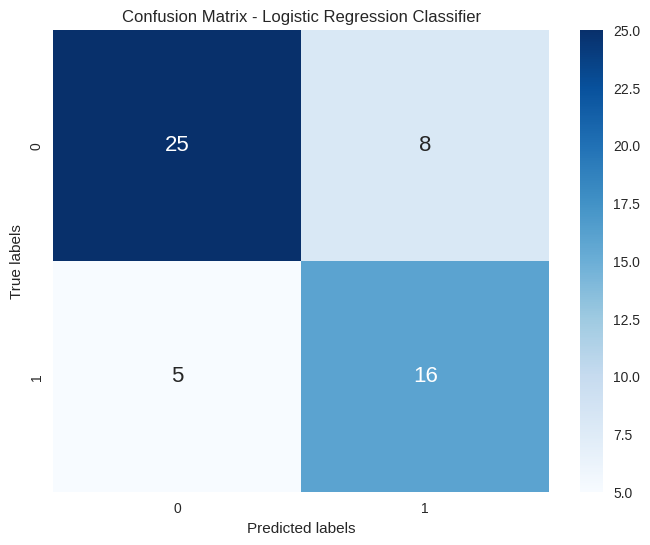

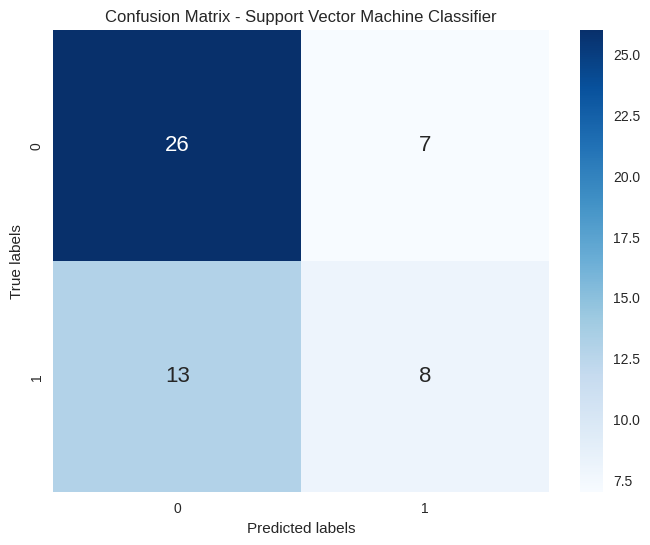

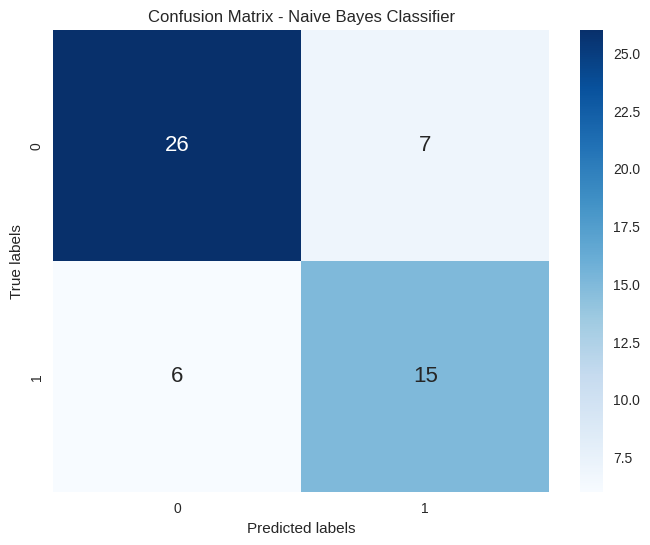

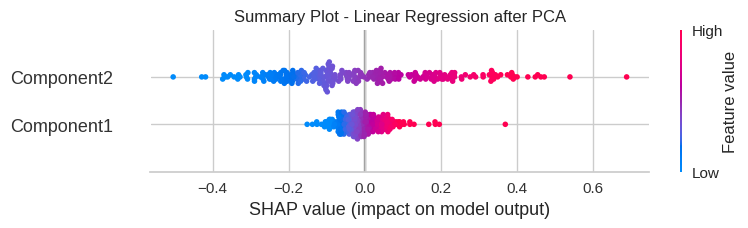

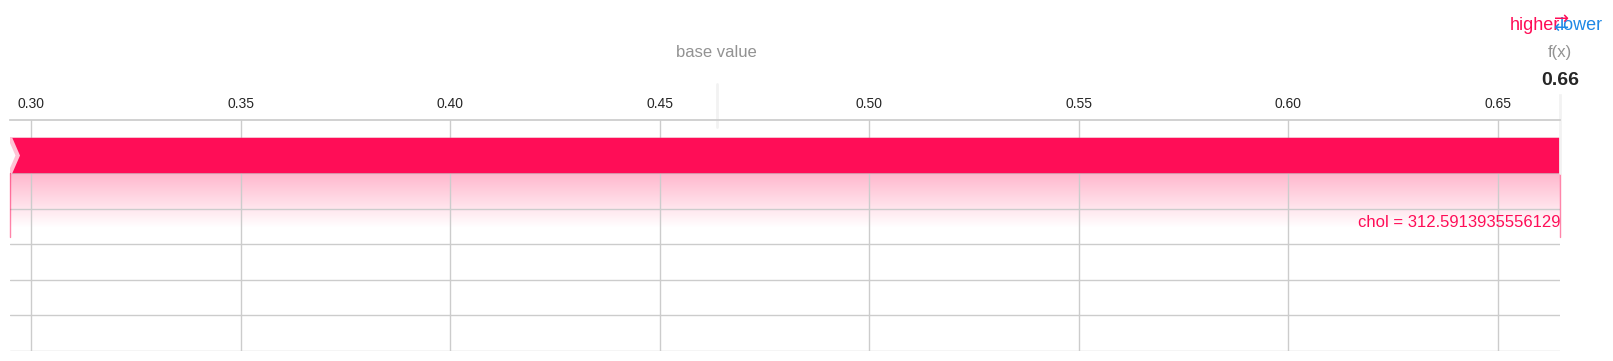

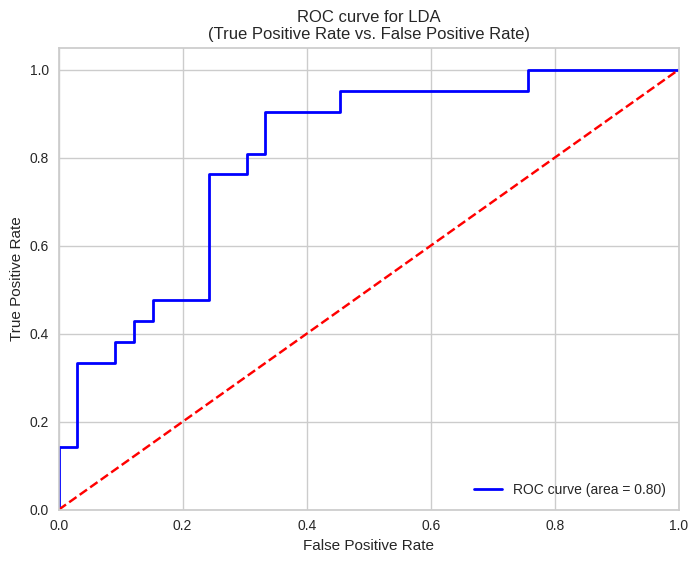

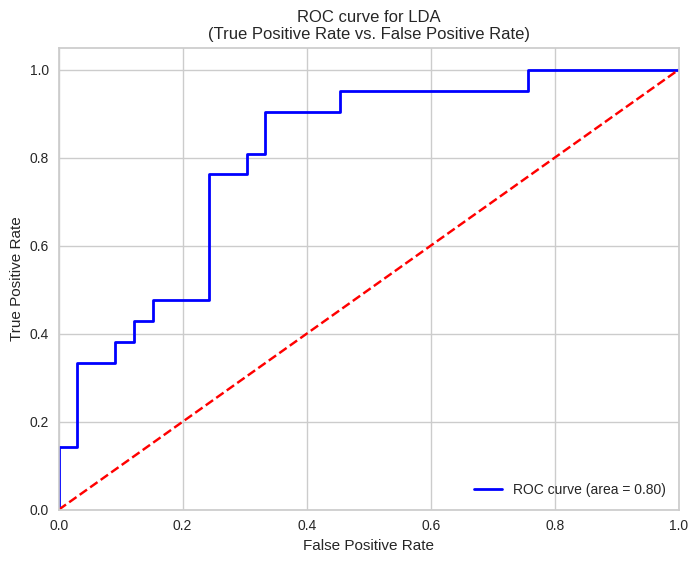

In [30]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/INSE 6220'



import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import shap
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import time
from pycaret.classification import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import (LinearRegression, LogisticRegression,
                                  RidgeClassifier)
from sklearn.metrics import (auc, classification_report, cohen_kappa_score,
                             confusion_matrix, f1_score, mean_squared_error,
                             precision_score, recall_score, roc_auc_score,
                             roc_curve)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import (accuracy_score, f1_score, matthews_corrcoef,
                             precision_score, recall_score)
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
df = pd.read_csv('Heart_disease_statlog.csv')

# Separate features from the target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))


df = pd.read_csv('Heart_disease_statlog.csv')

# Calculate mode, mean, and median of each column
mode_values = df.mode().iloc[0]  # Mode
mean_values = df.mean()           # Mean
median_values = df.median()       # Median

print("Mode:")
print(mode_values)
print("\nMean:")
print(mean_values)
print("\nMedian:")
print(median_values)


# Plot box plot with outliers shown as dots

selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca',]
df_selected = df[selected_variables]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected, showfliers=True, flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('Box Plot (Outliers as Dots)')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


#Matrix
# Read data from CSV file
df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']
df_selected = df[selected_variables]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the principal component loadings
pc_loadings = pca.components_.T

# Create a DataFrame for the PCA results with real variable names
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Calculate the correlation matrix from the original standardized data
correlation_matrix = pd.DataFrame(data=X_scaled, columns=selected_variables).corr()


# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#pair plot

# Create a DataFrame with the selected variables
df_selected = df[selected_variables]

category_variable = 'target'  # Assuming you have a categorical variable for comparison

# Plot the pair plot with two colors for comparison
sns.pairplot(df_selected, hue=category_variable, palette='coolwarm')
plt.title('Pair Plot of Selected Variables with Two Colors for Comparison')
plt.show()



#eigenvectorssssssssssssssssssssss


# Read data from CSV file
df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca',]
df_selected = df[selected_variables]
# Calculate the covariance matrix
cov_matrix = np.cov(df_selected.T)

# Calculate the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

#Calculate Z1 and Z2

#pca = PCA(n_components=2)  # Specify the number of components you want to retain
#X_pca = pca.fit_transform(df)

# Print eigenvalues
#print("Eigenvalues:")
#print(eigenvalues)

# Print eigenvectors
#print("Eigenvectors:")
#print(eigenvectors)

# Step 4: Calculate Z1 and Z2
#Z1 = X_pca[:, 0]  # Z1 corresponds to the first principal component
#Z2 = X_pca[:, 1]  # Z2 corresponds to the second principal component


#screen ploooooooooot

# Read data from CSV file
df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca',]
df_selected = df[selected_variables]

# Standardize the features
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected)

# Perform PCA
pca = PCA()
df_selected_pca = pca.fit_transform(df_selected_scaled)

# Plot scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

#pareto chartttttttttt

# Read data from CSV file
df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca',]
df_selected = df[selected_variables]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot Pareto chart
fig, ax1 = plt.subplots()

ax1.bar(x=range(1, len(explained_variance_ratio) + 1), height=explained_variance_ratio, color='blue', alpha=0.7)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio', color='blue')

ax2 = ax1.twinx()
ax2.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Explained Variance', color='red')

plt.title('Pareto Chart of Principal Components')
plt.show()


#coefficient plottttttttt


# Read data from CSV file
df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca',]
df_selected = df[selected_variables]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get principal component coefficients
pc_coef = pca.components_.T

# Create a biplot
plt.figure(figsize=(10, 8))

# Plot observations
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, label='Observations')

# Plot variable vectors
for i, coef in enumerate(pc_coef):
    plt.arrow(0, 0, coef[0], coef[1], color='r', alpha=0.5, width=0.01, head_width=0.1)
    plt.text(coef[0], coef[1], df_selected.columns[i], fontsize=9, ha='right')

# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot (PC1 vs PC2)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
# Create a biplot of PC coefficients
plt.figure(figsize=(10, 8))

# Plot PC coefficients
plt.scatter(pc_coef[:, 0], pc_coef[:, 1], alpha=0.5)

# Annotate each coefficient with variable name
for i, (x, y) in enumerate(zip(pc_coef[:, 0], pc_coef[:, 1])):
    plt.annotate(df_selected.columns[i], (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Set labels and title
plt.xlabel('A1')
plt.ylabel('A2')
plt.title('PC Coefficient Plot')

plt.grid(True)
plt.tight_layout()
plt.show()

#classification accurasyyyyyyyyy :

df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']
df_selected = df[selected_variables]
# Split the data into features and target
X = df_selected.drop(columns=['target'])
y = df_selected['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
     'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train each model and calculate evaluation metrics
results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    tt = end_time - start_time
    results[name] = {'Accuracy': accuracy, 'AUC': auc, 'Recall': recall, 'Prec.': precision, 'F1': f1, 'Kappa': kappa, 'MCC': mcc, 'TT (Sec)': tt}

# Create a DataFrame to display results
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results sorted by accuracy
print("Evaluation Metrics Results (Before PCA):")
print(results_df.sort_values(by='Accuracy', ascending=False))

 #afterrrrrrrrpcaaaaaaa

df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']
df_selected = df[selected_variables]
# Split the data into features and target
X = df_selected.drop(columns=['target'])
y = df_selected['target']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train each model and calculate evaluation metrics
results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    tt = end_time - start_time
    results[name] = {'Accuracy': accuracy, 'AUC': auc, 'Recall': recall, 'Prec.': precision, 'F1': f1, 'Kappa': kappa, 'MCC': mcc, 'TT (Sec)': tt}

# Create a DataFrame to display results
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results sorted by accuracy
print("Evaluation Metrics Results (After PCA):")
print(results_df.sort_values(by='Accuracy', ascending=False))

#newwwwww chapterrrrrrrrr
df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']
df_selected = df[selected_variables]

# Set up PyCaret environment
exp1 = setup(data=df_selected, target='target')

# Create Linear Discriminant Analysis model
lda_model = create_model('lda')

# Tune Linear Discriminant Analysis model
tuned_lda_model = tune_model(lda_model)

# Predict on test set
predictions = predict_model(tuned_lda_model)

# Evaluate model using cross-validation
fold = 5  # Number of folds for cross-validation
metrics = evaluate_model(tuned_lda_model)

# Display results
print(metrics)

#emtehani

df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']
df_selected = df[selected_variables]
# Split the data into features and target
X = df_selected.drop(columns=['target'])
y = df_selected['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()

#dovomi
df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']
df_selected = df[selected_variables]
# Split the data into features and target
X = df_selected.drop(columns=['target'])
y = df_selected['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Support Vector Machine classifier
model = SVC()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Support Vector Machine Classifier')
plt.show()

#sevomiii

df = pd.read_csv('Heart_disease_statlog.csv')
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']
df_selected = df[selected_variables]
# Split the data into features and target
X = df_selected.drop(columns=['target'])
y = df_selected['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()

#sharp
# Load data
df = pd.read_csv('Heart_disease_statlog.csv')

# Select variables
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']
df_selected = df[selected_variables]

# Split the data into features and target
X = df_selected.drop('target', axis=1)
y = df_selected['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train linear regression model after PCA
lr_pca_model = LinearRegression()
lr_pca_model.fit(X_pca, y)

# Initialize SHAP Explainer for linear regression model
lr_regr_explainer = shap.Explainer(lr_pca_model, X_pca)

# Compute SHAP values for linear regression model
lr_regr_shap_values = lr_regr_explainer.shap_values(X_pca)

# Generate summary plot for Linear Regression model after PCA
shap.summary_plot(lr_regr_shap_values, X_pca, feature_names=["Component1", "Component2"], show=False)
plt.title("Summary Plot - Linear Regression after PCA")
plt.show()

# Select a single observation for force plot
sample_idx = 1  # Change the index as needed

# Generate force plot for Linear Regression model after PCA for a single observation
shap.force_plot(lr_regr_explainer.expected_value, lr_regr_shap_values[sample_idx], X_pca[sample_idx],
                feature_names=["chol"], matplotlib=True)
plt.show()



#perfectttttttttttttttttttttt
# Load data
df = pd.read_csv('Heart_disease_statlog.csv')

# Select variables
selected_variables = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'target']
df_selected = df[selected_variables]

# Split the data into features and target
X = df_selected.drop('target', axis=1)
y = df_selected['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Linear Discriminant Analysis (LDA) model after PCA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_pca, y_train)

# Plot the ROC curve for LDA
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, lda_model.predict_proba(X_test_pca)[:,1])
roc_auc = roc_auc_score(y_test, lda_model.predict_proba(X_test_pca)[:,1])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LDA\n(True Positive Rate vs. False Positive Rate)')
plt.legend(loc="lower right")
plt.show()


